# <center> DIVISER POUR REGNER : Rotation d'une image bitmap </center>
<img src='arizona90.jpg' style='float:center' width=100%>

## 1.  Introduction
Dans cette feuille, nous allons aborder un exemple d'algorithme diviser pour régner et construire un algorithme qui permet d'effectuer la rotation d'une image bitmap, de $90°$.Cette rotation s'effectue en place, c'est à dire sans avoir besoin de mémoire supplémentaire, en modifiant directement les pixels de l'image.

## 2. Présentation
* Pour simplifier, on suppose dans cette activité que l'on travaille avec une image carrée dont la dimension est une puissance de $2$, par exemple $256 \times 256$, comme l'image affichée plus haut.
* Le principe est assez simple :
  * Découper l'image de départ en $4$ parties.
  * Effectuer la rotation de $90°$ sur chacune de ces parties.
  * Déplacer les $4$ parties vers leur position finale, pour assembler l'image tournée.
  
* Remarque : La rotation de l'image se fait de façon récursive.


## 3.  Programmation
### <center>Visualisation des images </center>
Nous allons utiliser la bibliothèque `pillow` pour manipuler des images, en particulier le module `Image`.
Si la bibiothèque n'est pas présente sur votre machine, ouvrez un terminal et exécutez l'une de ces 2 syntaxes :
* `pip install pillow`
* `python -m pip install pillow`

Les quelques lignes ci-dessous permettent ainsi :
* De charger un objet image dans la variable `im`.
* De récupérer le contenu de tous les pixels dans la variable `pixels`.
* D'afficher l'image dans le notebook.

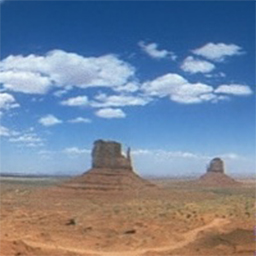

In [3]:
from PIL import Image
im=Image.open('arizona.jpg')
pixels=im.load()
im

##### Exercice 1: Manipulation des pixels
* Chaque pixel de l'image est ici codé sous forme d'un triplet de trois entiers compris entre 0 et 255 `(x,y,z)`  ou `x`, `y` et `z` correspondent respectivement à l'intensité de Rouge, Vert et Bleu (Codage RVB).

Ainsi le noir est codé `(0,0,0)` et le blanc `(255,255,255)`.

* Chaque pixel est de plus identifié par ses "coordonnées" dans la variable `pixels` qui ressemble à un tableau à deux dimensions.

Ainsi, pour accéder au pixel en haut à gauche, on utilise ici l'instruction `pixels[0,0]`

1. Quelle est la valeur du pixel en haut à gauche ?

In [2]:
#1.
pixels[0,0]

(102, 144, 186)

2. Quelle est la valeur du pixel en bas  à droite ?

In [4]:
#2.
pixels[255,255]

(154, 113, 117)

3. Pour modifier la valeur du pixel en haut à gauche en noir , on peut utiliser l'instruction `pixel[0,0]=(0,0,0)`. Colorier les quatre pixels du centre de l'image en vert et vérifier le résultat en affichant l'image.

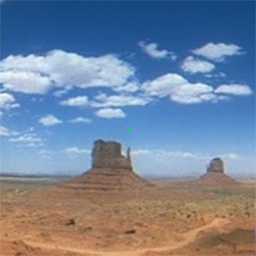

In [5]:
#3.
pixels[127,127]=(0,255,0)
pixels[128,128]=(0,255,0)
pixels[127,128]=(0,255,0)
pixels[128,127]=(0,255,0)

im

4. Recharger l'image et le contenu initial des pixels pour annuler les modifications précédentes

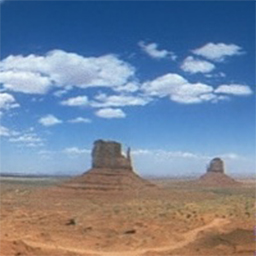

In [10]:
#4.
im=Image.open('arizona.jpg')
pixels=im.load()
im

##### Exercice 2 : Modifier une partie de l'image
<img src='ex2.png' style='float:right;' width=128>

A l'aide d'une double boucle `for`, écrire la fonction `carre(x,y,t)` qui trace un carré vert entre le pixel de coordonnées $(x,y)$ et le pixel de coordonnées $(x+t,y+t)$.


Ci-contre le résultat de `carre(112,112,32)`

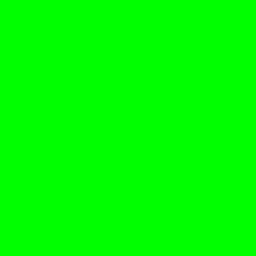

In [9]:
#Réponse:
def carre(x,y,t):
    for i in range(x,x+t):
        for j in range(y,y+t):
            pixels[i,j]=(0,255,0)
carre(0,0,256)
im

### <center>Rotation de l'image </center>
<img src='arizona90.png' style='float:center' width=75%>

La fonction `rotation(pixels,x,y,t)` doit tourner la partie carrée de l'image située entre les pixels de coordonnées $x,y$ et $x+t, y+t$. Cette fonction ne renvoie rien, elle modifie le tableau des pixels sur place. Pour simplifier, on suppose que $t$ est une puissance de $2$ :

* Si la partie de l'image à tourner est réduite à un pixel, c'est à dire lorsque $t=0$,  dans ce cas on ne fait rien et on sort de la fonction à l'aide de l'instruction `return`.
* Sinon, on effectue de façon récursive la rotation de chacune des 4 sous-parties de dimension deux fois plus petite $t/2$
* Il reste ensuite à déplacer les 4 régions en même temps, ce que l'on peut faire avec une double boucle et une affectation simultanée des quatre pixels qui échangent leur position.


##### Exercice 3:
Compléter le code de la fonction `rotation` en vous aidant du descriptif ci-dessus.

In [4]:
def rotation(pixels,x,y,t):
    if t==0:
        return
    else:
        t=t//2
        rotation(pixels,x,y,t)
        rotation(pixels,x,y+t,t)
        rotation(pixels,x+t,y,t)
        rotation(pixels,x+t,y+t,t)
    for i in range(x,x+t):
        for j in range(y,y+t):
            pixels[i,j+t],pixels[i+t,j+t],pixels[i,j],pixels[i+t,j]
            =pixels[i,j],pixels[i,j+t],pixels[i+t,j],pixels[i+t,j+t]
            
        

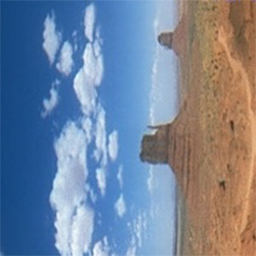

In [5]:
#On recharge l'image de départ
im=Image.open('arizona.jpg')
pixels=im.load()

#rotation de 90° de l'image entière
rotation(pixels,0,0,256)
im

##### Exercice 4 :
Alan a malencontreusement ecrasé l'image originale en faisant n'importe quoi avec la fonction `rotation`...
A l'aide de la fonction `rotation`, reconstituer l'image originale !

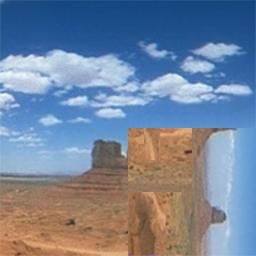

In [29]:
im=Image.open('arizonanimp.jpg')
pixels=im.load()
im

In [6]:
for i in range(6):
    for j in range(3):
        rotation(pixels,128,128,256//2**(6-i))

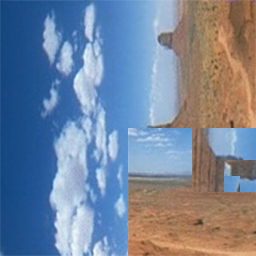

In [7]:
im